
# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This project is focused on analyzing movie data collected from The Movie Database (TMDb). We will focus on finding trends between the vote count, budget and the popularity of the movies and see how they influence the revenue generated.
This dataset contains 21 columns as listed below:
 1. Imbd_id: this column contains the movie asociated id for each entry of movie data.
 2. Popularity: how people watched the movie.
 3. Budget: the amount set out for the production of the movie.
 4. Revenue: The total amount generated from the movie sales.
 5. Original_title: the title for each movie.
 6. Cast: the actors.
 7. HomePage: a webspage for the movies.
 8. Director: the person incharge of the movie production.
 9. Tagline: a captivating summary of the movie.
 10. Overview: a description of the movie.
 11. Runtime: the length of the movie in minutes.
 12. Genre: the classification of the movie.
 13. Production_company: the compa incharge of the creation of the movie.
 14. Release_date: the exact date the movie was made public.
 15. Vote_count: the total number of votes for the movie.
 16. Vote_average: average votes for the movie.
 17. Release_year: the year the movie was made public.
 18. Budget_adj: the budget of the associated movie in terms of 2010 dollars,accounting for inflation over time
 19. revenue_adj: the revenue of the associated movie in terms of 2010 dollars,accounting for inflation over time
 20. id: the id for each movie data.
 21. keywords: ths column holds the words related to each movie.
 
 

### Question(s) for Analysis
We will be finding answers to the following questions:
- Question 1: What is the most popular movie?
- Question 2: Which movie had the highest vote count and was it the most popular movie?
- Question 3: What movie generated the highest revenue?
- Question 4: What was the yearly revenue generated and which year had the highest revenue?
- Question 5: Did popularity affect the vote_average per year?
- Question 6: How did the budget influence the revenue per year?
- Question 7: Did the number of movies affect the revenue?




In [42]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0
!pip install -U seaborn==0.11.2

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)
Requirement already up-to-date: seaborn==0.11.2 in /opt/conda/lib/python3.6/site-packages (0.11.2)


In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 



### Understanding the content of the dataset
> Here I will read the csv file containing the movie dataset into the pandas dataframe then view the columns using the function, df.head()

In [44]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [45]:
# check data details
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Descriptive statistics

Let's see what see the central tendency, dispersion and shape of our dataset.

You will notice that:
- the movies in this dataset where released between 1960 and 2015.
- the average voter count for the movies is slightly about 217 and the voter count is more spread out.
- The dataset is mostly right-skewed which means the mean is higher than the median(Q2), asides the year which is left-skewed and the revenue_adj symmetrically skewed, with the mean,median and mode distributed at the center.


In [46]:
# the shape of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [47]:
print(df.shape)

(10866, 21)


In [48]:
# defining the function for converting columns to int data type
def converter(col):
    df[col] = df[col].astype(int)
    return df[col]

In [49]:
# changing dtypes of revenue, budget and relese date
df['release_date']=pd.to_datetime(df['release_date'])

# calling the converter function to allow for better analyis
converter('revenue')
converter('budget')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj       

<a id='wrangling'></a>
## Data Wrangling

> There are missing values in these columns; homepage,keywords,prodution_companies,overview, director,cast, genres, and imbd_id
To clean our data set, we will be dropping columns we will not be using for our analysis, and fill values for empty cells we will use for the analysis.
I will drop homepage,keywords,prodution_companies,overview, director,cast columns because they are not needed for the questions we will be answering.

In [50]:
# setting id as the index column for the dataset
df.set_index('id', inplace=True)
df.head(2)

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


### Removing cells we do not need

In [51]:
# drop the homepage,keywords,prodution_companies,overview, director,cast columns as I will not be using them in my analysis.
df.drop(['homepage','keywords','production_companies','tagline','overview', 'director','cast'], axis=1, inplace = True)
df.head(1)


,imdb_id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


In [52]:
#  drop imdb_id since we will be using the id column as index
df.drop(['imdb_id'], axis=1, inplace = True)
df.head(1)

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


In [53]:
#  let's find the columns  that have null values or duplicate values and fix them

# columns with null values
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64


#### Removing Null values

In [54]:
# remove rows with incomplete data
df.dropna(inplace=True)
df.head(2)

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


In [55]:
#checking the number of rows and columns we have, notice 8 cols and 31rows have been removed.
print(df.shape)  

(10843, 12)


### Removing duplicates

In [56]:
#check for duplicate values
len(df[df.duplicated()])

1

In [57]:
# find the duplicate rows
df[df.duplicated()]

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,
42194,0.59643,30000000,967000,TEKKEN,92,Crime|Drama|Action|Thriller|Science Fiction,2010-03-20,110,5.0,2010,30000000.0,967000.0


In [58]:
# see the actual duplicates
df[df.index.isin([42194])]

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,
42194,0.59643,30000000,967000,TEKKEN,92,Crime|Drama|Action|Thriller|Science Fiction,2010-03-20,110,5.0,2010,30000000.0,967000.0
42194,0.59643,30000000,967000,TEKKEN,92,Crime|Drama|Action|Thriller|Science Fiction,2010-03-20,110,5.0,2010,30000000.0,967000.0


In [59]:
# drop duplicates & recheck
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

### Removing zeros from the budget and revenue columns

In [60]:

delZero = ['budget_adj', 'revenue_adj']

#replace 0 to NAN
df[delZero] = df[delZero].replace(0, np.NAN)

# Removing all the rows which has NaN values
df.dropna(subset = delZero, inplace=True)

df.isnull().values.any()# checks for NaN values

False

### Now we do not have NaN values let's proceed to answer some data driven questions and get insights.

### Vote_average

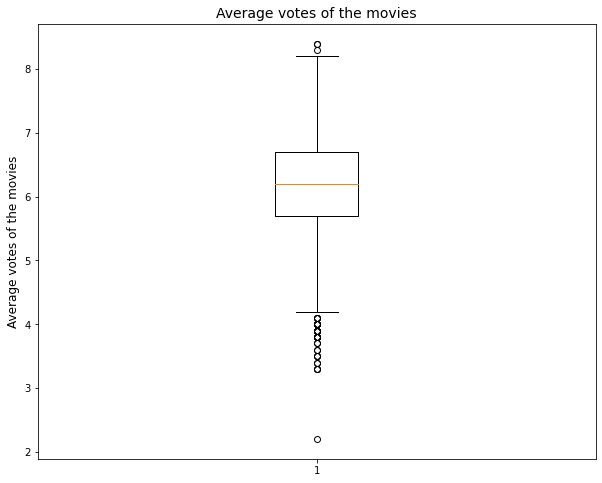

In [61]:
plt.figure(figsize=(10,8))
plt.ylabel('Average votes of the movies', fontsize=12)
plt.title('Average votes of the movies', fontsize=14)
plt.boxplot(df['vote_average']);

From the visualization above, we can see that:

There is a symmetric distribution, with the mean, mode and median at the center.

50% of the votes average are within 6.5.

The vote average falls between Min value of 4.2 and the Max vote average of about 8.3.

<a id='eda'></a>
## Exploratory Data Analysis


 #### Most of our questions are centered around getting the high performers in terms of popularity and vote_count. One repetitive structure will be checking highs on different columns, therefore I will define a function 'checkHigh' to check different columns for high values.

### Defining the  checkHigh function to retrieve high performers details

In [62]:
def checkHigh(colName):

  #checking for high values
  top = df[colName].idxmax()
  high = pd.DataFrame(df.loc[top])
  
    
  return high


### Creating a calculated column 'gains' to get profit per movie

In [63]:
#create gains column and insert into the dataframe
df['gains'] = df.apply(lambda row: row.revenue - row.budget, axis = 1)

df.head(1)

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,gains
id,,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810


### Research Question 1: What is the most popular movie?

In [64]:
checkHigh('popularity')

,135397
popularity,32.9858
budget,150000000
revenue,1513528810
original_title,Jurassic World
runtime,124
genres,Action|Adventure|Science Fiction|Thriller
release_date,2015-06-09 00:00:00
vote_count,5562
vote_average,6.5
release_year,2015


#### Jurassic World was the most popular movie

### Research Question 2  (: Which movie had the highest vote count and was it the most popular movie?)

In [65]:
checkHigh('vote_count')

,27205
popularity,9.36364
budget,160000000
revenue,825500000
original_title,Inception
runtime,148
genres,Action|Thriller|Science Fiction|Mystery|Adventure
release_date,2010-07-14 00:00:00
vote_count,9767
vote_average,7.9
release_year,2010


##### The most popular movie was Jurassic world but the movie with the highest vote count was Inception

### Research Question 3: What movie generated the highest revenue?

In [66]:
# Checking movie with the highest revenue
checkHigh('revenue_adj')

,19995
popularity,9.43277
budget,237000000
revenue,2781505847
original_title,Avatar
runtime,162
genres,Action|Adventure|Fantasy|Science Fiction
release_date,2009-12-10 00:00:00
vote_count,8458
vote_average,7.1
release_year,2009


##### The movie Avatar generated the highest revenue of  approximately 28 billion.

### Research Question 4: What was the yearly revenue generated and which year had the highest revenue?

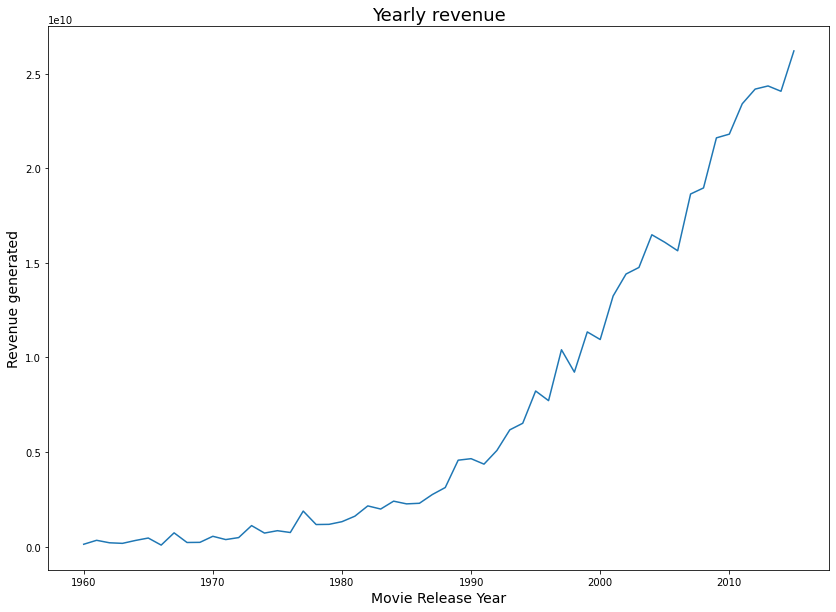

In [67]:
#deriving the yearly revenue
revenue_agg =df.groupby(['release_year'])['revenue'].sum()

plt.figure(figsize=(14,10))
plt.xlabel('Movie Release Year', fontsize=14)
plt.ylabel('Revenue generated', fontsize=14)
plt.title('Yearly revenue', fontsize=18)
plt.plot(revenue_agg);

In [68]:
#getting the year with the highest revenue
revenue_agg.idxmax()

2015

##### The revenue generated fluctuated over time with 2009 and 2015 recording high revenue growth. However the highest revenue was generated.

### Research Question 5: Did popularity affect the vote_average per year?

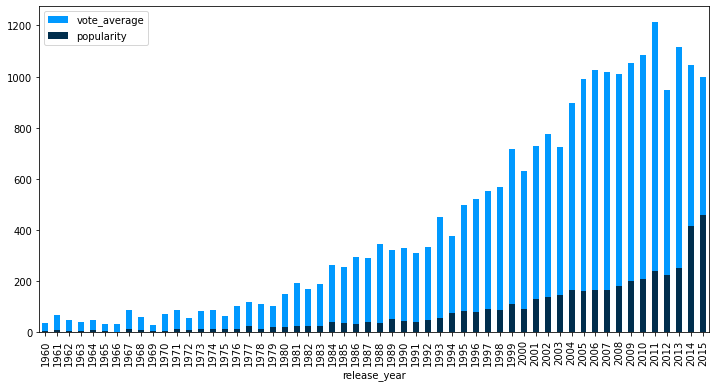

In [69]:
#checking vote_count & pop
yearly_votes = df.groupby(['release_year'])['vote_average'].sum()
yearly_pop = df.groupby(['release_year'])['popularity'].sum()

#creating visuals
yearly_votes.plot.bar(color = '#0099ff', figsize=(12,6))
yearly_pop.plot.bar(color = '#002e4d', figsize=(12,6))

plt.legend()

###### From the data 
- The vote average per year is higher than the popularity.However, in 2015 the vote_average was slightly higher than the popularity of the movies.

- The data is left-skewed, with the average votes pulled higher than the median.

- The popularity of the movies had less effect on the vote count.

### Research Question 6: How did the budget influence the revenue per year?

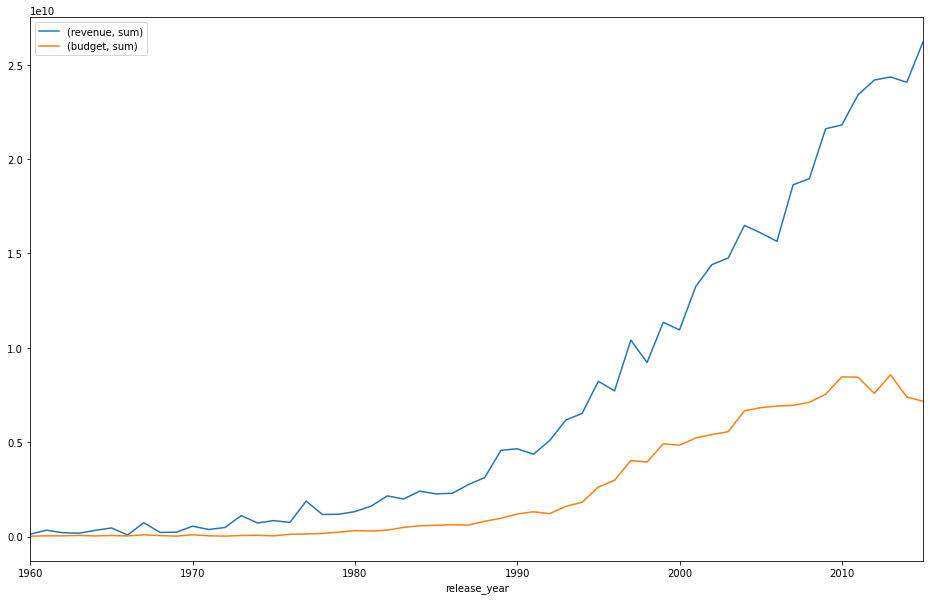

In [70]:
# creating a visualization to compare the revenue and the budget
df.groupby('release_year')[['revenue','budget']].agg(['sum']).plot(figsize=(16,10));
plt.legend(loc='best');

The revenue mostly increased as the budget increased,however between 1960 - 1970, the budget remained stable and there were years with more revenue growth.
Additionally, In 2015, while the budget reduced the revenue generated was high.

#### Research Question 7: Did the number of movies affect the revenue?

In [71]:
movie_count = df.groupby('release_year').agg(movie_count = ('original_title', 'count'))

movie_count

,movie_count
release_year,
1960,5
1961,10
1962,7
1963,6
1964,7
1965,5
1966,5
1967,13
1968,9


<AxesSubplot:xlabel='release_year'>

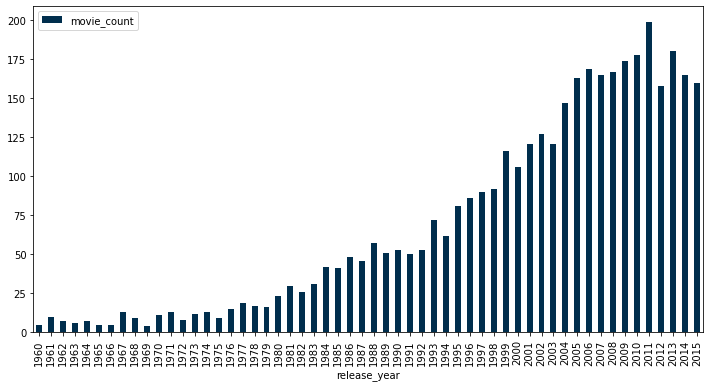

In [72]:
movie_count.plot.bar(color = '#002e4d', figsize=(12,6))

### From the visualization:
- The number of movies produced increased rapidly between 1984 - 2015.
- We can say that the revenue generated was due to the nuymber of movies beingg produced however, 2015 had the highest revenue than 2011 with the highest number of movies released.

<a id='conclusions'></a>
## Conclusions

Working on this dataset was quite interesting,et us summarize our findings;

- While we can see that the popularity of the movie had little effect on the vote_average of the movies per year, there are other factors like the genre,cast,runtime or nuymber of movies released that might also inflence the vote_average.Further analysis ca be conducted to get better insights.

- Due to missing values,sum of the dataset were removed, therefore,this analysis doesn't account for every year accurately.A more structured data will be beneficial in performing this analysis.

- The movies with the highest revenuye and most popular movies had an avergae vote frtgom 6.5 and above, which is the average vote for most movies.While this shows that the vote_avergae has an impact on the movie, it doesnot mean that all movies mut have a vote average of 6.5 and above to be successful.

- The revenue mostly increased as the budget increased,however between 1960 - 1970, the budget remained stable and there were years with more revenue growth.
- Additionally, In 2015, while the budget reduce the revenue generated was high.There are factors like inflation, the director, the cast, the genre that could have influenced the revenuye genreated frtgom these movies.

#### Limitations
There were missing and null values that affected the analysis, we cannot conclude on our findings because the data used for this analysis doesn't account for the whole population.





### Resources I used
- https://www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/

- https://www.statology.org/pandas-convert-column-to-int/

- https://www.statology.org/idxmax-pandas/
- https://datascientyst.com/use-groupby-multiple-columns-pandas/


In [73]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0